## Problem Statement 

To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution that can evaluate images and alert dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Import the necessary library 

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
# Define the file paths for the training and testing images
data_dir_train = pathlib.Path(r"C:\Users\fg722f\Documents\Upgrad - AI,ML\CNN\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train")
data_dir_test = pathlib.Path(r"C:\Users\fg722f\Documents\Upgrad - AI,ML\CNN\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Test")

print("Train directory exists:", data_dir_train.exists())
print("Test directory exists:", data_dir_test.exists())


Train directory exists: True
Test directory exists: True


In [3]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


## Keras - Preprocessing

## Parameter for loader 

In [4]:
batch_size = 32
img_height = 180
img_width = 180

### Training - dataset

In [5]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split = 0.2,
    subset='training',
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


### Validating --  dataset

In [6]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split = 0.2,
    subset='validation',
    image_size=(img_height, img_width),
    batch_size=batch_size)



Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [7]:
# Correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


## Visualization 

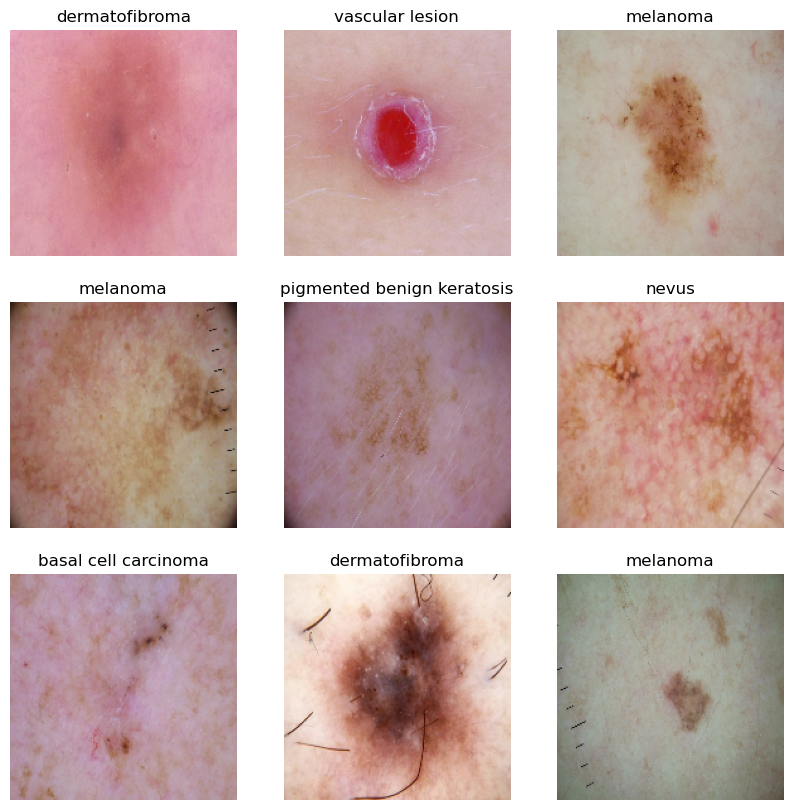

In [8]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

Dataset.cache() stores images in memory after they are loaded from disk during the first epoch, reducing disk I/O and speeding up training.

Dataset.prefetch() optimizes performance by overlapping data preprocessing with model execution, ensuring efficient data pipeline utilization during training.

In [9]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Creating the model

In [10]:
target_labels = 9

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, (3, 3), padding='same', activation=tf.nn.relu),
  layers.MaxPooling2D(),
  layers.Conv2D(32, (3, 3), padding='same', activation=tf.nn.relu),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (3, 3), padding='same', activation=tf.nn.relu),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation=tf.nn.relu),
  layers.Dense(target_labels)
])

C:\Users\fg722f\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
### Model Summary

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,989,801 (15.22 MB)

 Trainable params: 3,989,801 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
%%time
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 75s 343ms/step - accuracy: 0.2204 - loss: 2.0690 - val_accuracy: 0.4091 - val_loss: 1.5050
Epoch 2/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 47s 275ms/step - accuracy: 0.4657 - loss: 1.4367 - val_accuracy: 0.4915 - val_loss: 1.3438
Epoch 3/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 48s 286ms/step - accuracy: 0.5513 - loss: 1.2160 - val_accuracy: 0.5635 - val_loss: 1.1554
Epoch 4/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 48s 282ms/step - accuracy: 0.5997 - loss: 1.0728 - val_accuracy: 0.6295 - val_loss: 1.0198
Epoch 5/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 53s 315ms/step - accuracy: 0.6964 - loss: 0.8530 - val_accuracy: 0.6518 - val_loss: 0.9718
Epoch 6/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 49s 288ms/step - accuracy: 0.7442 - loss: 0.7127 - val_accuracy: 0.6704 - val_loss: 0.9635
Epoch 7/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 45s 264ms/step - accuracy: 0.7839 - loss: 0.6018 - val_accuracy: 0.6919 - val_loss: 0.8539
Epoch 8/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 45s 268ms/step - accuracy: 0.8268 - loss: 0

### Visualizing the Training Results

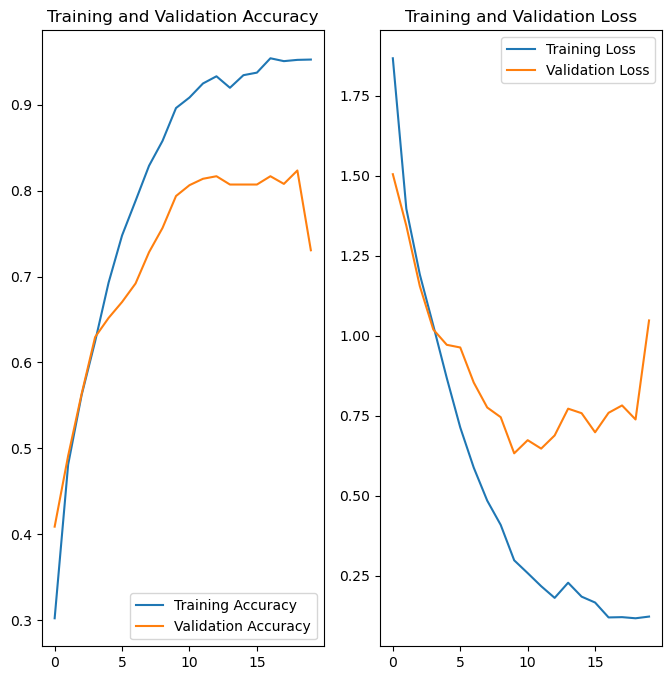

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Observations:
- The model's training accuracy steadily increases to 90%, while validation accuracy remains consistently around 55%.
  
- The high training accuracy suggests that the model has learned patterns from the training data effectively. However, its poor performance on validation data indicates a lack of generalization, meaning the model is overfitting to the training set.

- To mitigate overfitting, data augmentation techniques will be applied. Given the limited training data, new samples will be generated by introducing slight modifications to existing images, such as horizontal and vertical flips, minor rotations, and other transformations. These augmented images will enhance model robustness and improve its ability to generalize to unseen data.


## After analyzing the model's fit history for signs of underfitting or overfitting, choose an appropriate data augmentation strategy.

In [16]:
augmentation_data = keras.Sequential([
    layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

### Visualize how your data augmentation strategy applies to a single instance of a training image

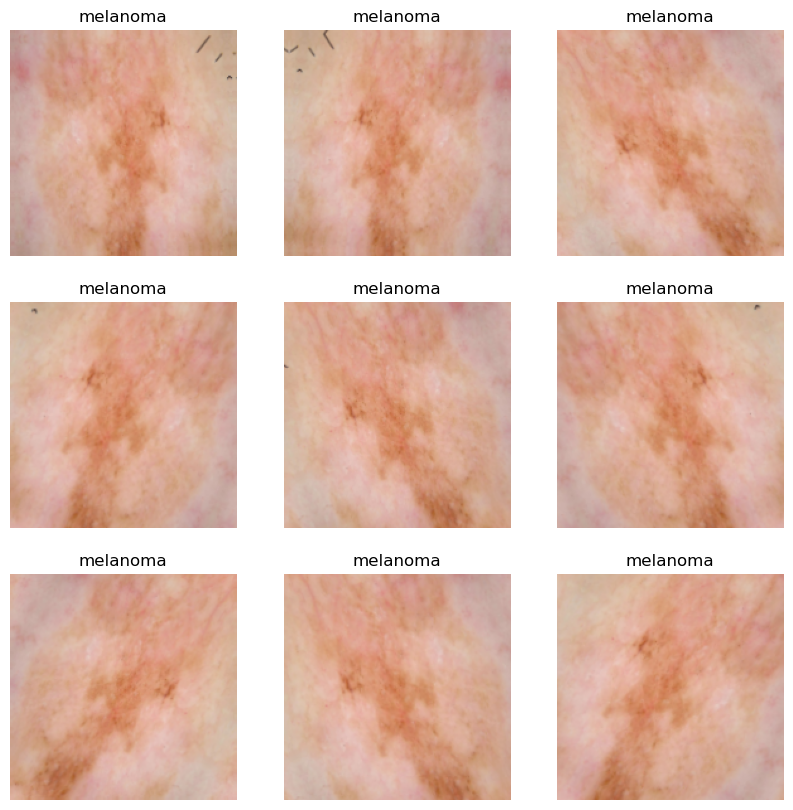

In [17]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        augmented_images = augmentation_data(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.title(class_names[labels[0]])
        plt.axis("off")

### Using the Drop Out layer

In [18]:
model = Sequential([
  augmentation_data,
  layers.Rescaling(1./255),
  layers.Conv2D(16, (3, 3), padding='same', activation=tf.nn.relu),
  layers.MaxPooling2D(),
  layers.Conv2D(32, (3, 3), padding='same', activation=tf.nn.relu),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (3, 3), padding='same', activation=tf.nn.relu),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation=tf.nn.relu),
  layers.Dense(target_labels)
])

### Train the model

In [19]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
%%time
## Your code goes here, note: train your model for 20 epochs
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 54s 300ms/step - accuracy: 0.2173 - loss: 2.0713 - val_accuracy: 0.3586 - val_loss: 1.6578
Epoch 2/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 58s 342ms/step - accuracy: 0.3911 - loss: 1.5863 - val_accuracy: 0.4803 - val_loss: 1.3885
Epoch 3/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 52s 308ms/step - accuracy: 0.4731 - loss: 1.3709 - val_accuracy: 0.5011 - val_loss: 1.3772
Epoch 4/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 51s 304ms/step - accuracy: 0.5028 - loss: 1.3020 - val_accuracy: 0.5405 - val_loss: 1.2751
Epoch 5/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 51s 301ms/step - accuracy: 0.5267 - loss: 1.2543 - val_accuracy: 0.5605 - val_loss: 1.2119
Epoch 6/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 49s 291ms/step - accuracy: 0.5511 - loss: 1.1901 - val_accuracy: 0.5538 - val_loss: 1.1914
Epoch 7/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 50s 295ms/step - accuracy: 0.5664 - loss: 1.1695 - val_accuracy: 0.6021 - val_loss: 1.0930
Epoch 8/20
169/169 ━━━━━━━━━━━━━━━━━━━━ 51s 303ms/step - accuracy: 0.5849 - loss: 1

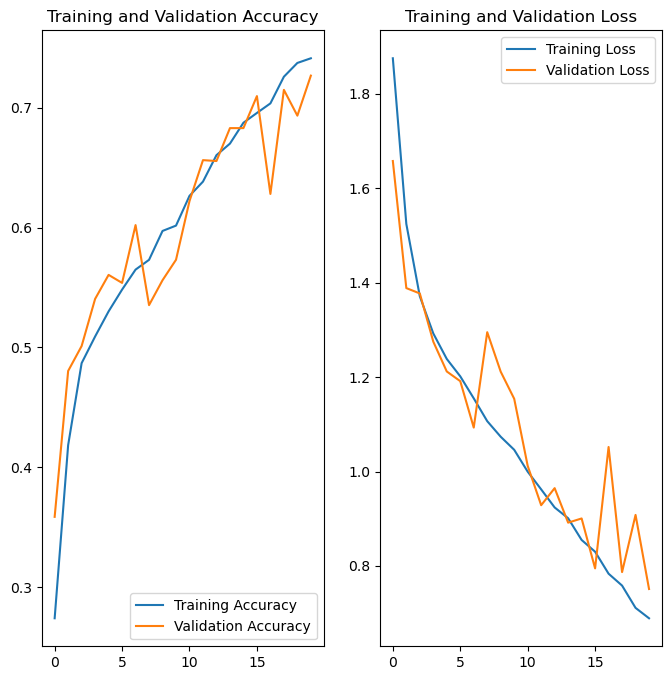

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Observations:
- By utilizing augmented data, the issue of overfitting has been effectively mitigated.

- The training and validation accuracy now fall within a similar range, suggesting improved generalization.

- However, both the training and validation accuracies are showing poor performance, indicating that the model is now underfitting.


In [22]:
from glob import glob

## find the image path for all class labels (lesions)
images_path_list = [ i for i in glob(os.path.join(data_dir_train, '*', '*.jpg')) ]

lesions_list = [ os.path.basename(os.path.dirname(j)) for j in glob(os.path.join(data_dir_train, '*', '*.jpg')) ]
print(len(lesions_list))

2239


In [23]:
# Extract image path and class label in a dictionary
image_dict = dict(zip(images_path_list, lesions_list))
print(list(image_dict.items())[:5])

[('C:\\Users\\fg722f\\Documents\\Upgrad - AI,ML\\CNN\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\ISIC_0025780.jpg', 'actinic keratosis'), ('C:\\Users\\fg722f\\Documents\\Upgrad - AI,ML\\CNN\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\ISIC_0025803.jpg', 'actinic keratosis'), ('C:\\Users\\fg722f\\Documents\\Upgrad - AI,ML\\CNN\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\ISIC_0025825.jpg', 'actinic keratosis'), ('C:\\Users\\fg722f\\Documents\\Upgrad - AI,ML\\CNN\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\ISIC_0025953.jpg', 'actinic keratosis'), ('C:\\Users\\fg722f\\Documents\\Upgrad - AI,ML\\CNN\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\ISIC_0025957.jpg', 'actinic keratosis')]


In [24]:
# View the image paths and corresponding class labels in a DataFrame
lesions_df = pd.DataFrame(list(image_dict.items()), columns=['Image Path', 'Label'])
lesions_df.head()

,Image Path,Label
0,"C:\Users\fg722f\Documents\Upgrad - AI,ML\CNN\C...",actinic keratosis
1,"C:\Users\fg722f\Documents\Upgrad - AI,ML\CNN\C...",actinic keratosis
2,"C:\Users\fg722f\Documents\Upgrad - AI,ML\CNN\C...",actinic keratosis
3,"C:\Users\fg722f\Documents\Upgrad - AI,ML\CNN\C...",actinic keratosis
4,"C:\Users\fg722f\Documents\Upgrad - AI,ML\CNN\C...",actinic keratosis


In [25]:
## Inspecting the class distribution in the dataset
lesions_df[['Label']].value_counts()

Label                     
pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: count, dtype: int64

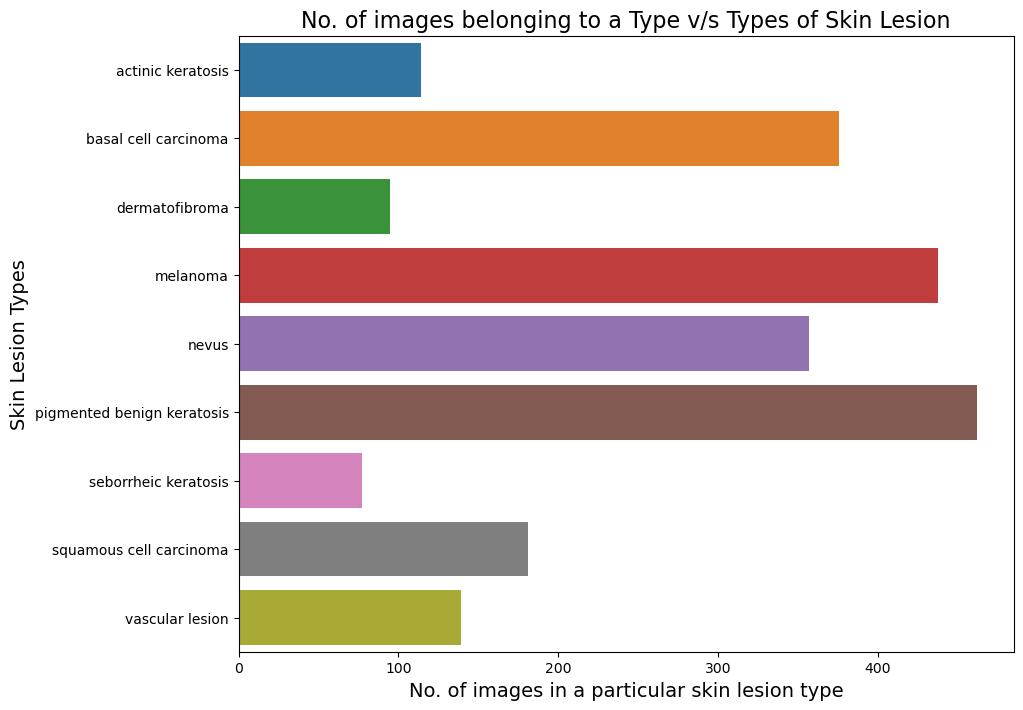

In [26]:
# Visualize the distribution of classes using a countplot

import seaborn as sns

plt.figure(figsize=(10, 8))
sns.countplot(y="Label", data=lesions_df)
plt.title('No. of images belonging to a Type v/s Types of Skin Lesion', fontsize=16)
plt.xlabel('No. of images in a particular skin lesion type', fontsize=14)
plt.ylabel('Skin Lesion Types', fontsize=14)
plt.show()

In [27]:
round(lesions_df[['Label']].value_counts(normalize=True)*100, 2)

Label                     
pigmented benign keratosis    20.63
melanoma                      19.56
basal cell carcinoma          16.79
nevus                         15.94
squamous cell carcinoma        8.08
vascular lesion                6.21
actinic keratosis              5.09
dermatofibroma                 4.24
seborrheic keratosis           3.44
Name: proportion, dtype: float64

### Observations:
- A clear class imbalance is observed in the training data.

- The class **"seborrheic keratosis"** constitutes the smallest proportion of samples, making up approximately **3.44%**.

- In contrast, the classes **"pigmented benign keratosis"** and **"melanoma"** dominate the dataset, representing approximately **20.63%** and **19.56%** of the data, respectively.


In [28]:
path_to_training_dataset = str(data_dir_train) + '/'

import Augmentor

for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)

Initialised with 114 image(s) found.
Output directory set to C:\Users\fg722f\Documents\Upgrad - AI,ML\CNN\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x27891883590>: 100%|█| 500/500 [00:06<00:00, 83.19 Samples/


Initialised with 376 image(s) found.
Output directory set to C:\Users\fg722f\Documents\Upgrad - AI,ML\CNN\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x278D62B8410>: 100%|█| 500/500 [00:06<00:00, 75.73 Samples/


Initialised with 95 image(s) found.
Output directory set to C:\Users\fg722f\Documents\Upgrad - AI,ML\CNN\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x278D6276390>: 100%|█| 500/500 [00:07<00:00, 71.41 Samples/


Initialised with 438 image(s) found.
Output directory set to C:\Users\fg722f\Documents\Upgrad - AI,ML\CNN\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/melanoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x278D5DE2150>: 100%|█| 500/500 [00:28<00


Initialised with 357 image(s) found.
Output directory set to C:\Users\fg722f\Documents\Upgrad - AI,ML\CNN\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/nevus\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x278D34616D0>: 100%|█| 500/500 [00:25<00:00, 20.00 Samples


Initialised with 462 image(s) found.
Output directory set to C:\Users\fg722f\Documents\Upgrad - AI,ML\CNN\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x27891865C10>: 100%|█| 500/500 [00:06<00:00, 73.01 Samples/


Initialised with 77 image(s) found.
Output directory set to C:\Users\fg722f\Documents\Upgrad - AI,ML\CNN\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x278D139CD90>: 100%|█| 500/500 [00:13<00:00, 36.27 Samples


Initialised with 181 image(s) found.
Output directory set to C:\Users\fg722f\Documents\Upgrad - AI,ML\CNN\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x278D353BC50>: 100%|█| 500/500 [00:06<00:00, 76.83 Samples/


Initialised with 139 image(s) found.
Output directory set to C:\Users\fg722f\Documents\Upgrad - AI,ML\CNN\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x278D5E148D0>: 100%|█| 500/500 [00:06<00:00, 78.91 Samples/


In [29]:
# Verifying the total count of images after the augmentation
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

9000


### Let's examine the distribution of the augmented data after adding new images to the original training dataset

In [30]:
# extracting the augmented image paths in a list
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new[:5]

['C:\\Users\\fg722f\\Documents\\Upgrad - AI,ML\\CNN\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_19df1b64-294e-4f75-9187-e6390dcc0b2f.jpg',
 'C:\\Users\\fg722f\\Documents\\Upgrad - AI,ML\\CNN\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_60ffb8bb-a54e-4b34-8673-99c796b68c43.jpg',
 'C:\\Users\\fg722f\\Documents\\Upgrad - AI,ML\\CNN\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_77f997c2-8f25-4d27-a3d7-7047cf4317df.jpg',
 'C:\\Users\\fg722f\\Documents\\Upgrad - AI,ML\\CNN\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_9d697ca1-517f-407f-a12a-7da8324

In [31]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new[:5]

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis']

In [32]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [33]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Image Path','Label'])
new_df = pd.concat([lesions_df, df2], ignore_index=True)
new_df.shape

(11239, 2)

In [34]:
new_df.head()

,Image Path,Label
0,"C:\Users\fg722f\Documents\Upgrad - AI,ML\CNN\C...",actinic keratosis
1,"C:\Users\fg722f\Documents\Upgrad - AI,ML\CNN\C...",actinic keratosis
2,"C:\Users\fg722f\Documents\Upgrad - AI,ML\CNN\C...",actinic keratosis
3,"C:\Users\fg722f\Documents\Upgrad - AI,ML\CNN\C...",actinic keratosis
4,"C:\Users\fg722f\Documents\Upgrad - AI,ML\CNN\C...",actinic keratosis


In [35]:
# Inspecting the classes after adding 500 samples per label
new_df['Label'].value_counts()

Label
pigmented benign keratosis    1462
melanoma                      1438
basal cell carcinoma          1376
nevus                         1357
squamous cell carcinoma       1181
vascular lesion               1139
actinic keratosis             1114
dermatofibroma                1095
seborrheic keratosis          1077
Name: count, dtype: int64

In [36]:
# Inspecting the classes (% age wise) after adding 500 samples per label
round(new_df['Label'].value_counts(normalize=True)*100, 2)

Label
pigmented benign keratosis    13.01
melanoma                      12.79
basal cell carcinoma          12.24
nevus                         12.07
squamous cell carcinoma       10.51
vascular lesion               10.13
actinic keratosis              9.91
dermatofibroma                 9.74
seborrheic keratosis           9.58
Name: proportion, dtype: float64

### Train the model on the data created using Augmentor

In [37]:
batch_size = 32
img_height = 180
img_width = 180

### Training dataset

In [38]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11239 files belonging to 9 classes.
Using 8992 files for training.


### Validation dataset

In [39]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11239 files belonging to 9 classes.
Using 2247 files for validation.


### Model with Normalization

In [40]:
model = Sequential([
  augmentation_data,
  layers.Rescaling(1./255),
  layers.Conv2D(16, (3, 3), padding='same', activation=tf.nn.relu),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Conv2D(32, (3, 3), padding='same', activation=tf.nn.relu),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (3, 3), padding='same', activation=tf.nn.relu),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation=tf.nn.relu),
  layers.Dense(target_labels)
])

### Train the model

In [41]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [42]:
%%time
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 210s 719ms/step - accuracy: 0.2732 - loss: 3.0251 - val_accuracy: 0.1718 - val_loss: 16.9215
Epoch 2/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 199s 709ms/step - accuracy: 0.4198 - loss: 1.5003 - val_accuracy: 0.4299 - val_loss: 1.6181
Epoch 3/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 180s 639ms/step - accuracy: 0.4680 - loss: 1.3945 - val_accuracy: 0.4878 - val_loss: 1.3198
Epoch 4/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 191s 678ms/step - accuracy: 0.4992 - loss: 1.2904 - val_accuracy: 0.5162 - val_loss: 1.1567
Epoch 5/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 184s 652ms/step - accuracy: 0.5216 - loss: 1.2027 - val_accuracy: 0.5256 - val_loss: 1.1751
Epoch 6/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 170s 604ms/step - accuracy: 0.5537 - loss: 1.1439 - val_accuracy: 0.5652 - val_loss: 1.1432
Epoch 7/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 173s 614ms/step - accuracy: 0.5739 - loss: 1.0940 - val_accuracy: 0.5897 - val_loss: 1.0724
Epoch 8/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 179s 637ms/step - accuracy: 0.5986 

In [43]:
model = Sequential([
  augmentation_data,
  layers.Rescaling(1./255),
  layers.Conv2D(16, (3, 3), padding='same', activation=tf.nn.relu),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Conv2D(32, (3, 3), padding='same', activation=tf.nn.relu),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (3, 3), padding='same', activation=tf.nn.relu),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation=tf.nn.relu),
  layers.Dense(target_labels)
])

### Train the Model 

In [44]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [45]:
%%time
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 260s 875ms/step - accuracy: 0.2878 - loss: 3.5128 - val_accuracy: 0.1509 - val_loss: 22.5871
Epoch 2/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 245s 873ms/step - accuracy: 0.3617 - loss: 1.6663 - val_accuracy: 0.3111 - val_loss: 2.4115
Epoch 3/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 241s 857ms/step - accuracy: 0.4158 - loss: 1.5032 - val_accuracy: 0.4597 - val_loss: 1.3610
Epoch 4/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 241s 858ms/step - accuracy: 0.4675 - loss: 1.3447 - val_accuracy: 0.4032 - val_loss: 1.5602
Epoch 5/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 247s 879ms/step - accuracy: 0.4896 - loss: 1.2744 - val_accuracy: 0.4793 - val_loss: 1.5388
Epoch 6/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 249s 886ms/step - accuracy: 0.5215 - loss: 1.2155 - val_accuracy: 0.5189 - val_loss: 1.2496
Epoch 7/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 240s 852ms/step - accuracy: 0.5687 - loss: 1.1274 - val_accuracy: 0.1985 - val_loss: 3.0677
Epoch 8/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 252s 895ms/step - accuracy: 0.5666 

### Model Summary

In [46]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)            │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_3 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 180, 180, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 90, 90, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 45, 45, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,970,301 (45.66 MB)

 Trainable params: 3,990,025 (15.22 MB)

 Non-trainable params: 224 (896.00 B)

 Optimizer params: 7,980,052 (30.44 MB)

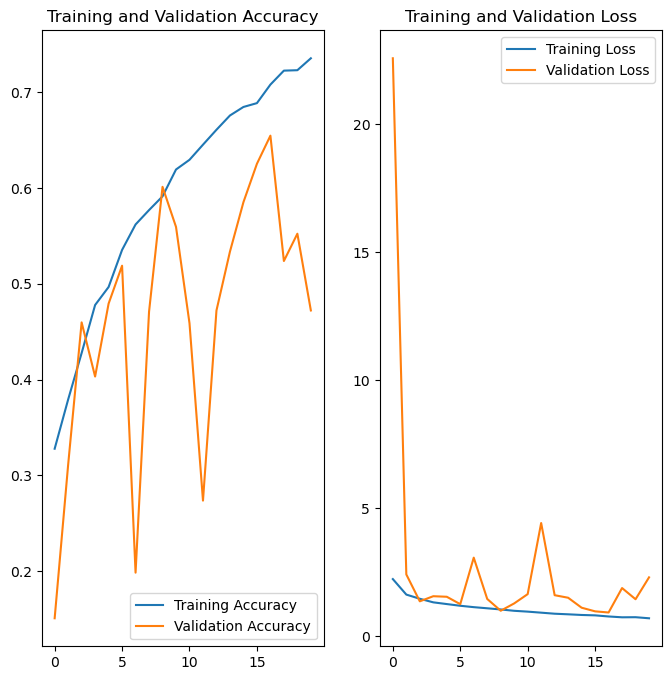

In [47]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Create the model without Batch Normalization 

In [48]:
model = Sequential([
  augmentation_data,
  layers.Rescaling(1./255),
  layers.Conv2D(16, (3, 3), padding='same', activation=tf.nn.relu),
  layers.MaxPooling2D(),
  layers.Conv2D(32, (3, 3), padding='same', activation=tf.nn.relu),
  layers.MaxPooling2D(),
  layers.Conv2D(64, (3, 3), padding='same', activation=tf.nn.relu),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation=tf.nn.relu),
  layers.Dense(target_labels)
])

In [49]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
checkpoint = ModelCheckpoint("model.keras", monitor="val_accuracy", save_best_only=True, mode="auto", verbose=1)

# Early stop the training when a monitored metric ceases to show improvement
earlystop = EarlyStopping(monitor="val_accuracy", patience=5, mode="auto", verbose=1)

### Train the model 

In [50]:
%%time

epochs = 50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[checkpoint, earlystop]
)

Epoch 1/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step - accuracy: 0.2516 - loss: 1.9658
Epoch 1: val_accuracy improved from -inf to 0.48020, saving model to model.keras
281/281 ━━━━━━━━━━━━━━━━━━━━ 118s 402ms/step - accuracy: 0.2519 - loss: 1.9649 - val_accuracy: 0.4802 - val_loss: 1.4744
Epoch 2/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step - accuracy: 0.4542 - loss: 1.4304
Epoch 2: val_accuracy improved from 0.48020 to 0.53004, saving model to model.keras
281/281 ━━━━━━━━━━━━━━━━━━━━ 144s 511ms/step - accuracy: 0.4542 - loss: 1.4302 - val_accuracy: 0.5300 - val_loss: 1.2622
Epoch 3/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step - accuracy: 0.5068 - loss: 1.3026
Epoch 3: val_accuracy improved from 0.53004 to 0.56030, saving model to model.keras
281/281 ━━━━━━━━━━━━━━━━━━━━ 129s 457ms/step - accuracy: 0.5068 - loss: 1.3025 - val_accuracy: 0.5603 - val_loss: 1.1738
Epoch 4/50
281/281 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step - accuracy: 0.5430 - loss: 1.1980
Epoch 4: val_accuracy improved from 

### Model Summary

In [51]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)            │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_4 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,969,405 (45.66 MB)

 Trainable params: 3,989,801 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,979,604 (30.44 MB)

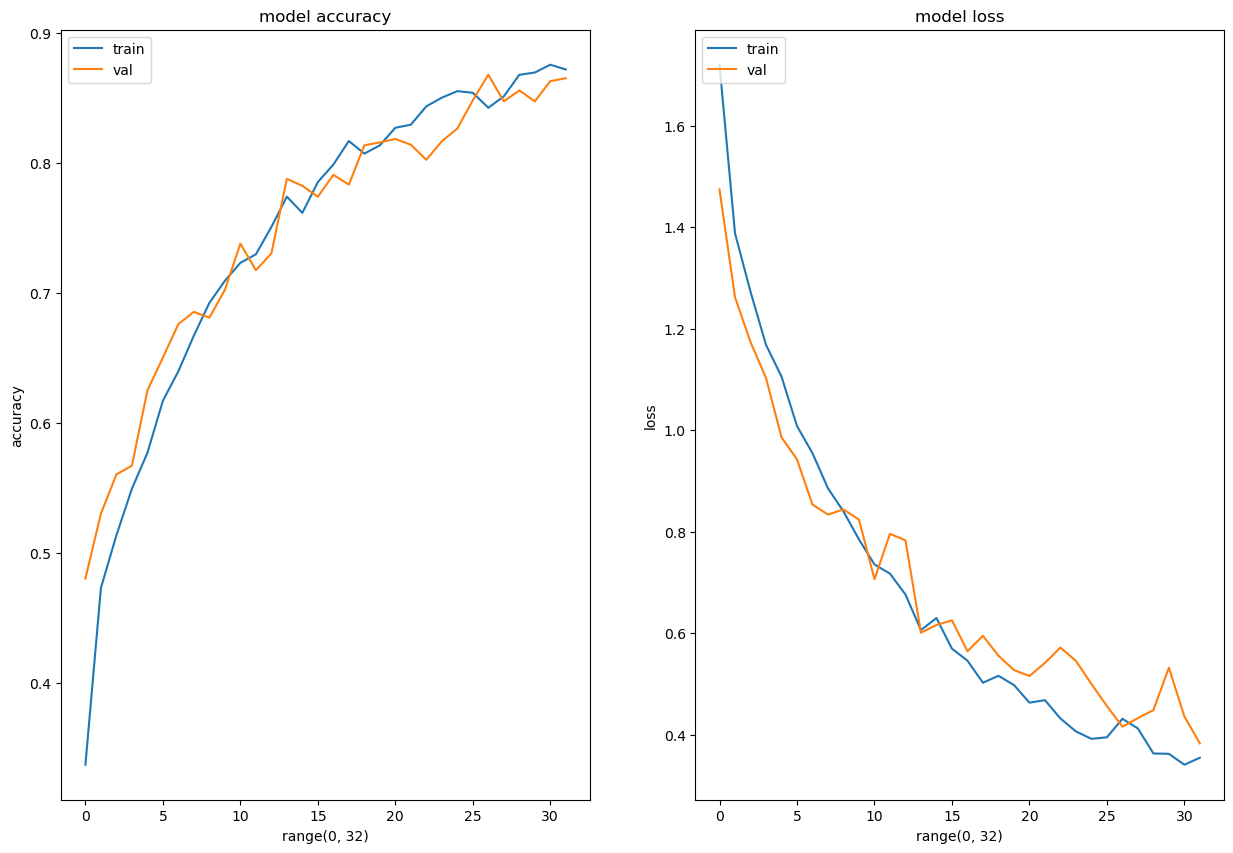

In [52]:
epochs_range = range(earlystop.stopped_epoch+1)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)

#Plot Model Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel(epochs_range)
plt.legend(['train', 'val'], loc='upper left')

#Plot Model Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel(epochs_range)
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Observations:
- The final model demonstrates balanced performance, with no signs of underfitting or overfitting.

- Implementing class rebalancing has significantly enhanced the model's performance on both the training and validation datasets.

- After 37 epochs, the model achieves an accuracy of **84%** on the training set and approximately **79%** on the validation set.

- The minimal gap between training and validation accuracies indicates the model's strong ability to generalize.

- However, the introduction of batch normalization did not result in any noticeable improvements in either training or validation accuracy.


### Model Evaluation 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step
Actual Class: basal cell carcinoma
Predicted Class: squamous cell carcinoma


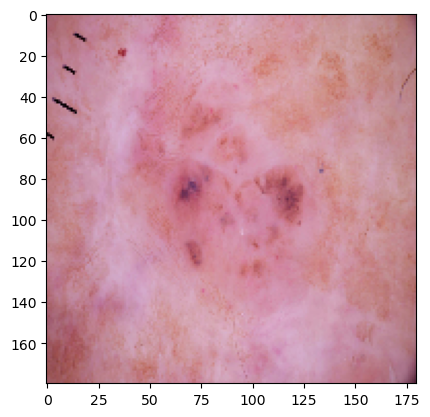

In [53]:
from tensorflow.keras.preprocessing.image import load_img

image_path_test = os.path.join(data_dir_test, class_names[1], '*')
test_image = glob(image_path_test)
test_image = load_img(test_image[-1], target_size=(180, 180, 3))
plt.imshow(test_image)
plt.grid(False)

img = np.expand_dims(test_image, axis=0)
predicted = model.predict(img)
predicted = np.argmax(predicted)
predicted_class = class_names[predicted]
print("Actual Class: " + class_names[1] +'\n'+ "Predicted Class: " + predicted_class)